# Practice Case Machine Learning: <br> Customer Segmentation
## By : Kurnia Aditia <br> Data Fellowship Batch 6

#### Scenario
This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. Please answer the question below and explore your creativity. 


In [114]:
# Import library and data
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('ML_2_Fellow.zip',encoding= 'unicode_escape')
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Pre-Processing

* Check Missing Value

In [115]:
miss_val=df.isnull().sum()
miss_val[miss_val>0]

Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [116]:
'''Some variable have missing value, some variable have similar amount of missing value and
the highest number of missing value is Kode_Pelanggan.
So I check the cause of missing value that have similar amount in some variable
'''
df[df['Kode_Barang'].isnull()]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
#There is 6035 row with stack column, so I will split it to make it clear
df_stack=df[df['Kode_Barang'].isnull()]
expand_stack1=df_stack['Kode_Bayar'].str.split(",",n=2,expand=True)
expand_stack1

,0,1,2
109,536381,82567,"""AIRLINE LOUNGE,METAL SIGN"",2,12/1/2010 9:41,2..."
253,536394,21506,"""FANCY FONT BIRTHDAY CARD, "",24,12/1/2010 10:3..."
871,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE "",48,12/1/2010 1..."
956,536520,22760,"""TRAY, BREAKFAST IN BED"",1,12/1/2010 12:43,12...."
1014,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",1,12/1/20..."
...,...,...,...
541379,581498,22041,"""RECORD FRAME 7"""" SINGLE SIZE "",2,12/9/2011 10..."
541549,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR, "",12,12/9/..."
541614,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",24,12/9/2..."
541649,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN"",1,12/9/2..."


In [118]:
expand_stack2=expand_stack1[2].str.split('",',n=1,expand=True)
expand_stack2[0].replace('"','',regex=True,inplace=True)
expand_stack2[0].replace(',','',regex=True,inplace=True)
expand_stack2

,0,1
109,AIRLINE LOUNGEMETAL SIGN,"2,12/1/2010 9:41,2.1,15311,United Kingdom"
253,FANCY FONT BIRTHDAY CARD,"24,12/1/2010 10:39,0.42,13408,United Kingdom"
871,RECORD FRAME 7 SINGLE SIZE,"48,12/1/2010 12:27,2.1,16210,United Kingdom"
956,TRAY BREAKFAST IN BED,"1,12/1/2010 12:43,12.75,14729,United Kingdom"
1014,SWISS ROLL TOWEL CHOCOLATE SPOTS,"1,12/1/2010 12:43,2.95,14729,United Kingdom"
...,...,...
541379,RECORD FRAME 7 SINGLE SIZE,"2,12/9/2011 10:26,5.79,,United Kingdom"
541549,DIAMANTE HEART SHAPED WALL MIRROR,"12,12/9/2011 10:46,3.95,12985,United Kingdom"
541614,SWISS ROLL TOWEL CHOCOLATE SPOTS,"24,12/9/2011 11:26,1.25,14422,United Kingdom"
541649,CHARLIE+LOLAEXTREMELY BUSY SIGN,"1,12/9/2011 11:34,0.39,14446,United Kingdom"


In [119]:
expand_stack3=expand_stack2[1].str.split(',',expand=True)
expand_stack3

,0,1,2,3,4
109,2,12/1/2010 9:41,2.1,15311,United Kingdom
253,24,12/1/2010 10:39,0.42,13408,United Kingdom
871,48,12/1/2010 12:27,2.1,16210,United Kingdom
956,1,12/1/2010 12:43,12.75,14729,United Kingdom
1014,1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...
541379,2,12/9/2011 10:26,5.79,,United Kingdom
541549,12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,1,12/9/2011 11:34,0.39,14446,United Kingdom


In [120]:
# join columns that already splitted
expand_stack1[2]=expand_stack2[0]
expand_stack1[[3,4,5,6,7]]=expand_stack3[[0,1,2,3,4]]
# match column name with the original data frame
expand_stack1.columns=df.columns
# change data type for numeric variable
expand_stack1['Jumlah']=expand_stack1['Jumlah'].astype(float)
expand_stack1['Harga_Satuan']=pd.to_numeric(expand_stack1['Harga_Satuan'])
expand_stack1['Kode_Pelanggan']=pd.to_numeric(expand_stack1['Kode_Pelanggan'])
expand_stack1

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,AIRLINE LOUNGEMETAL SIGN,2.0,12/1/2010 9:41,2.10,15311.0,United Kingdom
253,536394,21506,FANCY FONT BIRTHDAY CARD,24.0,12/1/2010 10:39,0.42,13408.0,United Kingdom
871,536477,22041,RECORD FRAME 7 SINGLE SIZE,48.0,12/1/2010 12:27,2.10,16210.0,United Kingdom
956,536520,22760,TRAY BREAKFAST IN BED,1.0,12/1/2010 12:43,12.75,14729.0,United Kingdom
1014,536520,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,1.0,12/1/2010 12:43,2.95,14729.0,United Kingdom
...,...,...,...,...,...,...,...,...
541379,581498,22041,RECORD FRAME 7 SINGLE SIZE,2.0,12/9/2011 10:26,5.79,NaN,United Kingdom
541549,581501,22165,DIAMANTE HEART SHAPED WALL MIRROR,12.0,12/9/2011 10:46,3.95,12985.0,United Kingdom
541614,581516,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,24.0,12/9/2011 11:26,1.25,14422.0,United Kingdom
541649,581538,85071C,CHARLIE+LOLAEXTREMELY BUSY SIGN,1.0,12/9/2011 11:34,0.39,14446.0,United Kingdom


In [121]:
expand_stack1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6035 entries, 109 to 541787
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kode_Bayar         6035 non-null   object 
 1   Kode_Barang        6035 non-null   object 
 2   Barang             6035 non-null   object 
 3   Jumlah             6035 non-null   float64
 4   Tanggal_Transaksi  6035 non-null   object 
 5   Harga_Satuan       6035 non-null   float64
 6   Kode_Pelanggan     3647 non-null   float64
 7   Negara             6035 non-null   object 
dtypes: float64(3), object(5)
memory usage: 424.3+ KB


Concat cleaned stack column with the original data frame

In [122]:
# drop column that have similar amount of missing value
df.dropna(subset=['Kode_Barang'],inplace=True)
df0 = pd.concat([df,expand_stack1],ignore_index=True)

In [123]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        541909 non-null  object 
 2   Barang             540455 non-null  object 
 3   Jumlah             541909 non-null  float64
 4   Tanggal_Transaksi  541909 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     406829 non-null  float64
 7   Negara             541909 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [124]:
'''Because Kode_Pelanggan is still have highest missing value and
this variable is one of variable that will use in further analysis, 
so I won't drop the column but I drop missing value based on Kode_Pelanggan's missing value
'''
df0.dropna(subset=['Kode_Pelanggan'],inplace=True)
# Re-check for the missing value
miss_val=df0.isnull().sum()
miss_val[miss_val>0]

Series([], dtype: int64)

* Check the data content

In [125]:
# I check potential error of numeric variable that will be a problem for next analysis
# I check Jumlah and Harga_Satuan variable
df0[df0['Jumlah']<=0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
140,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
153,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
234,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
235,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
236,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
541029,C574026,51014C,FEATHER PENCOAL BLACK,-1.0,11/2/2011 12:26,0.39,14606.0,United Kingdom
541648,C579903,85159B,WHITE TEACOFFEESUGAR JARS,-7.0,12/1/2011 8:41,1.95,18130.0,United Kingdom
541783,C580912,22041,RECORD FRAME 7 SINGLE SIZE,-24.0,12/6/2011 13:37,2.55,12989.0,United Kingdom
541882,C581466,21216,SET 3 RETROSPOT TEACOFFEESUGAR,-1.0,12/8/2011 19:20,4.95,13883.0,United Kingdom


In [126]:
df0[df0['Harga_Satuan']<=0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
9170,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.0,12/5/2010 14:02,0.0,12647.0,Germany
33162,539263,22580,ADVENT CALENDAR GINGHAM SACK,4.0,12/16/2010 14:36,0.0,16560.0,United Kingdom
39576,539722,22423,REGENCY CAKESTAND 3 TIER,10.0,12/21/2010 13:45,0.0,14911.0,EIRE
46407,540372,22090,PAPER BUNTING RETROSPOT,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom
46409,540372,22553,PLASTERS IN TIN SKULLS,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom
55807,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1.0,1/13/2011 15:10,0.0,15107.0,United Kingdom
85435,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2/10/2011 13:08,0.0,17560.0,United Kingdom
128246,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36.0,3/23/2011 10:25,0.0,13239.0,United Kingdom
137383,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5.0,3/30/2011 12:45,0.0,13113.0,United Kingdom
143043,548871,22162,HEART GARLAND RUSTIC PADDED,2.0,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [127]:
# Jumlah and Harga Satuan variable have value below and equal to 0. 
# First, I filter row based on criteria that Jumlah variable value above 0
df1=df0[df0['Jumlah']>0]
# Re-check variable Jumlah
df1[df1['Jumlah']<=0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara


In [128]:
# Re-check variable Harga_Satuan
df1[df1['Harga_Satuan']<=0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
9170,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.0,12/5/2010 14:02,0.0,12647.0,Germany
33162,539263,22580,ADVENT CALENDAR GINGHAM SACK,4.0,12/16/2010 14:36,0.0,16560.0,United Kingdom
39576,539722,22423,REGENCY CAKESTAND 3 TIER,10.0,12/21/2010 13:45,0.0,14911.0,EIRE
46407,540372,22090,PAPER BUNTING RETROSPOT,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom
46409,540372,22553,PLASTERS IN TIN SKULLS,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom
55807,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1.0,1/13/2011 15:10,0.0,15107.0,United Kingdom
85435,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2/10/2011 13:08,0.0,17560.0,United Kingdom
128246,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36.0,3/23/2011 10:25,0.0,13239.0,United Kingdom
137383,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5.0,3/30/2011 12:45,0.0,13113.0,United Kingdom
143043,548871,22162,HEART GARLAND RUSTIC PADDED,2.0,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         397924 non-null  object 
 1   Kode_Barang        397924 non-null  object 
 2   Barang             397924 non-null  object 
 3   Jumlah             397924 non-null  float64
 4   Tanggal_Transaksi  397924 non-null  object 
 5   Harga_Satuan       397924 non-null  float64
 6   Kode_Pelanggan     397924 non-null  float64
 7   Negara             397924 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.3+ MB


In [130]:
# There is still a problem in Harga_Satuan Variable that 0 value still exist
# So I filter data row based on criteria that Harga_Satuan variable value above 0
df2=df1[df1['Harga_Satuan']>0]
# Re-check Harga Satuan
df2[df2['Harga_Satuan']<=0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara


In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         397884 non-null  object 
 1   Kode_Barang        397884 non-null  object 
 2   Barang             397884 non-null  object 
 3   Jumlah             397884 non-null  float64
 4   Tanggal_Transaksi  397884 non-null  object 
 5   Harga_Satuan       397884 non-null  float64
 6   Kode_Pelanggan     397884 non-null  float64
 7   Negara             397884 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.3+ MB


* Check Compatibility Data Type

In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         397884 non-null  object 
 1   Kode_Barang        397884 non-null  object 
 2   Barang             397884 non-null  object 
 3   Jumlah             397884 non-null  float64
 4   Tanggal_Transaksi  397884 non-null  object 
 5   Harga_Satuan       397884 non-null  float64
 6   Kode_Pelanggan     397884 non-null  float64
 7   Negara             397884 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.3+ MB


In [133]:
# There is incorrectness type in Tanggal_Transaksi, its should be date type not object type
# So we change the data type of Tanggal_Transaksi
df2['Tanggal_Transaksi']=pd.to_datetime(df2['Tanggal_Transaksi'])

<ipython-input-133-93b217e9b0a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tanggal_Transaksi']=pd.to_datetime(df2['Tanggal_Transaksi'])


* Create new column to support further analysis

In [134]:
# Create variable Total_Sales that extract from product Jumlah and Harga Satuan 
df2['Total_Sales']=df2['Jumlah'] * df2['Harga_Satuan']
df2.head()

<ipython-input-134-ea9dd23aebc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Sales']=df2['Jumlah'] * df2['Harga_Satuan']


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Objective 1 
What items customers buy the most and are there any items we should ignore?

In [135]:
barang=df2.groupby(['Barang'],as_index=False).agg({'Jumlah':'sum'})
barang

,Barang,Jumlah
0,4 PURPLE FLOCK DINNER CANDLES,140.0
1,50'S CHRISTMAS GIFT BAG LARGE,1885.0
2,DOLLY GIRL BEAKER,2398.0
3,I LOVE LONDON MINI BACKPACK,360.0
4,I LOVE LONDON MINI RUCKSACK,1.0
...,...,...
3863,ZINC T-LIGHT HOLDER STARS SMALL,4894.0
3864,ZINC TOP 2 DOOR WOODEN SHELF,10.0
3865,ZINC WILLIE WINKIE CANDLE STICK,2607.0
3866,ZINC WIRE KITCHEN ORGANISER,25.0


In [136]:
# 5 items that customer buy the most
barang.sort_values('Jumlah',ascending=False).head()

,Barang,Jumlah
2315,PAPER CRAFT LITTLE BIRDIE,80995.0
1988,MEDIUM CERAMIC TOP STORAGE JAR,77916.0
3779,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415.0
1759,JUMBO BAG RED RETROSPOT,46181.0
3691,WHITE HANGING HEART T-LIGHT HOLDER,36725.0


PAPER CRAFT LITTLE BIRDIE, MEDIUM CERAMIC TOP STORAGE JAR, WORLD WAR 2 GLIDERS ASSTD DESIGNS, JUMBO BAG RED RETROSPOT,<br> WHITE HANGING HEART T-LIGHT HOLDER are 5 items that customer buy the most

In [137]:
# In my opinion, items that we should ignore are items with purchase amount equal to 1
# So here I filter the row to find what items with purchase amount equal to 1
print(barang[barang['Jumlah']==1].head())
print('Number of items with amount purchase equal to 1 are',len(barang[barang['Jumlah']==1]),'items')
print('In other words, there are',len(barang[barang['Jumlah']==1]), 'items that we shoud ignore')

                                 Barang  Jumlah
4           I LOVE LONDON MINI RUCKSACK     1.0
152   AMBER BERTIE GLASS BEAD BAG CHARM     1.0
159    AMBER GLASS/SHELL/PEARL NECKLACE     1.0
278  BAROQUE BUTTERFLY EARRINGS CRYSTAL     1.0
354    BLACK DROP EARRINGS W LONG BEADS     1.0
Number of items with amount purchase equal to 1 are 59 items
In other words, there are 59 items that we shoud ignore


#### Objective 2
What is our strategy to increase sales based on our export destination countries?

* Expand more marketing cost to country that have strongest demand based on total transaction amount

In [138]:
#Extract country that have the most demand amount
negara1 = df2.groupby('Negara',as_index=False).agg({'Jumlah':'sum'}).sort_values('Jumlah',ascending=False)
negara1

,Negara,Jumlah
35,United Kingdom,4256740.0
23,Netherlands,200361.0
10,EIRE,140275.0
14,Germany,119261.0
13,France,111471.0
0,Australia,83901.0
31,Sweden,36083.0
32,Switzerland,30082.0
30,Spain,27940.0
19,Japan,26016.0


<AxesSubplot:xlabel='Negara'>

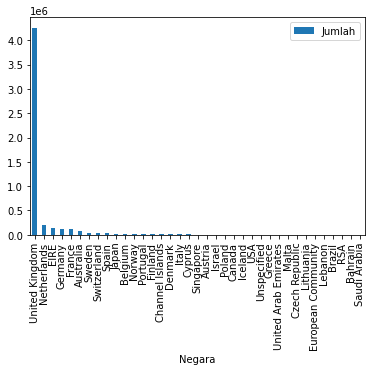

In [139]:
# Show 10 country with the most d
negara1.plot('Negara','Jumlah',kind='bar')

#### Objective 3 :
Do customer segmentation appropriately. Please explain in detail and completely

Customer segmentation use concept RFM analysis to manipulate original data and get them approriate variable to cluster the customer.

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.
Source :https://clevertap.com/blog/rfm-analysis/

In [140]:
#Create RFM feature
lastDate=max(df2.Tanggal_Transaksi)
df_rfm = df2.groupby('Kode_Pelanggan').agg({
    'Tanggal_Transaksi': lambda x: (lastDate - x.max()).days,
    'Kode_Bayar': 'count',
    'Total_Sales': 'sum'})
df_rfm.columns= ['Recency','Frequency','Monetary_Value']
df_rfm.head()

,Recency,Frequency,Monetary_Value
Kode_Pelanggan,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [141]:
# Standarize RFM feature
scaler = StandardScaler()
scaler.fit(df_rfm)
rfm_normalized = scaler.transform(df_rfm)
rfm_normalized

array([[ 2.33457414e+00, -3.96577702e-01,  8.35866818e+00],
       [-9.05340320e-01,  3.94648958e-01,  2.50966264e-01],
       [-1.75359593e-01, -2.65435162e-01, -2.85960063e-02],
       ...,
       [-8.45341904e-01, -3.48492104e-01, -2.08742313e-01],
       [-8.85340848e-01,  2.90384290e+00,  4.51854273e-03],
       [-4.95351144e-01, -9.49498596e-02, -2.41412739e-02]])

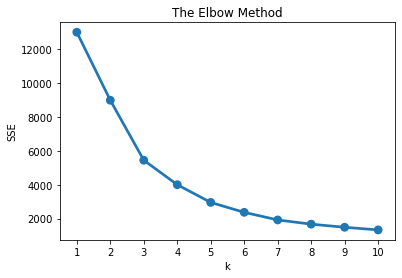

In [142]:
# K-Means Clustering
# Searching for optimal cluster using Elbow method evaluation
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [143]:
# The optimal cluster is 3 based on Elbow method evaluation
# Modeling
model = KMeans(n_clusters=3, random_state=70)
model.fit(rfm_normalized)
model.labels_.shape

(4338,)

In [144]:
df_rfm.shape

(4338, 3)

In [145]:
df_rfm['Cluster']=model.labels_
df_rfm.head()

,Recency,Frequency,Monetary_Value,Cluster
Kode_Pelanggan,,,,
12346.0,325,1,77183.60,0
12347.0,1,182,4310.00,1
12348.0,74,31,1797.24,1
12349.0,18,73,1757.55,1
12350.0,309,17,334.40,0


In [146]:
df_rfm['Cluster'].value_counts()

1    3245
0    1080
2      13
Name: Cluster, dtype: int64

#### Visualisation K-Means Result

Text(0, 0.5, 'Frequency')

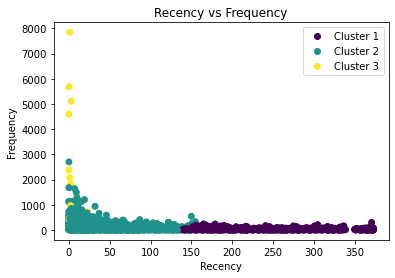

In [147]:
legend=['Cluster 1','Cluster 2','Cluster 3']
# Recency vs Frequency
result1=plt.scatter(
    df_rfm['Recency'], 
    df_rfm['Frequency'],
    c=df_rfm['Cluster'])
plt.legend(handles=result1.legend_elements()[0], 
       labels=legend)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Monetary Value')

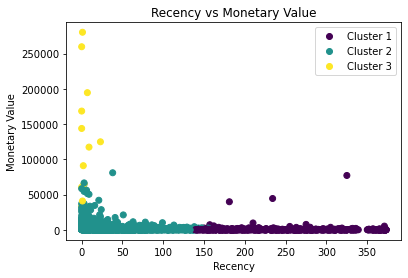

In [148]:
# Recency vs Monetary Value
result2=plt.scatter(
    df_rfm['Recency'], 
    df_rfm['Monetary_Value'],
    c=df_rfm['Cluster'])
plt.legend(handles=result2.legend_elements()[0], 
       labels=legend)
plt.title('Recency vs Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')

Text(0, 0.5, 'Monetary Value')

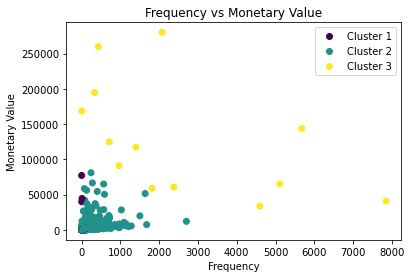

In [149]:
# Frequency vs Monetary Value
result3=plt.scatter(
    df_rfm['Frequency'], 
    df_rfm['Monetary_Value'],
    c=df_rfm['Cluster'])
plt.legend(handles=result3.legend_elements()[0], 
       labels=legend)
plt.title('Frequency vs Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')

#### Additional Insight

Text(0, 0.5, 'Total_Pembelian')

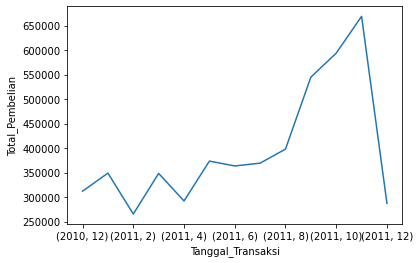

In [150]:
# Sales by month
df2.groupby([df2['Tanggal_Transaksi'].dt.year,df2['Tanggal_Transaksi'].dt.month])['Jumlah'].sum().plot(kind='line')
plt.xlabel('Tanggal_Transaksi')
plt.ylabel('Total_Pembelian')

In [151]:
#customer with highest total sales
cust=df2.groupby('Kode_Pelanggan').agg({'Jumlah':'sum','Total_Sales':'sum'})
cust[cust['Total_Sales']==max(cust['Total_Sales'])]

,Jumlah,Total_Sales
Kode_Pelanggan,,
14646.0,196915.0,280206.02


In [152]:
#customer with highest transaction amount in one time transaction
df2[df2['Jumlah']==max(df2['Jumlah'])]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total_Sales
541888,581483,23843,PAPER CRAFT LITTLE BIRDIE,80995.0,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6
